# Multiple Linear Regression Modeling for Sale Price Prediction at Elite Properties Group

# 1. Business Understanding


Elite Properties Group has the need to develop a reliable and accurate model that predicts the sale prices of residential properties based on their key attributes. By leveraging historical data, including features such as the number of bedrooms, bathrooms, square footage of living space, lot size, number of floors, property condition and year built, the agency aims to provide clients with precise pricing recommendations and maximize their returns on investment.

The primary objective of this project is to build a robust predictive model that accurately estimates the sale prices of residential properties listed by Elite Properties Group. By utilizing the available dataset, the agency aims to offer clients reliable and data-driven pricing advice, enhancing their confidence in the sales process and facilitating optimal pricing strategies.

Before building the model, we will address the following descriptive questions through data exploration:
#### 1. Does the number of bedrooms have an impact on sale price?
#### 2. How does square feet of living room area impact sale price?
#### 3. Does presence or absence of a waterfront have an impact on saleprice?

# 2. Data Understanding
To gain a comprehensive understanding of the dataset provided by Elite Properties Group, I will examine the features and identify the key ones to use when creating models to predict the sale prices. 
The dataset `kc_house_data.csv` contains attributes such as: 
* Saleprice
* Number of Bedrooms
* Number of Bathrooms
* Year Built
* Date the house was sold
* Whether the house is on a waterfront
* Square footage of living space in the home
* Number of floors (levels) in house
* Quality of view from house

## Relevance of these features
The provided features in the dataset have significant relevance in predicting the sale prices of residential properties. The number of bedrooms and bathrooms provides insights into the property's size and functionality, which are crucial factors influencing its value. The square footage of the living space provides an indication of the overall spaciousness and potential use of the property, impacting its desirability and pricing. The number of floors reflects the property's layout and can affect its appeal to potential buyers.

The year built feature provides insights into the property's age, which can impact its condition, modernity, and potential maintenance costs. By considering these features collectively, we can develop a comprehensive model that accurately predicts sale prices and assists Elite Properties Group in providing valuable pricing advice to their clients.

The column names and descriptions as provided can be found in the `column_names.md` file in this repository. For convenience they have been reproduced below.

### Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** - is prediction target
* **bedroomsNumber** - of Bedrooms/House
* **bathroomsNumber** - of bathrooms/bedrooms
* **sqft_livingsquare** - footage of the home
* **sqft_lotsquare** - footage of the lot
* **floorsTotal** - floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# 3. Data Preparation
We first import the relevant packages for this analysis.

In [1]:
# importing the relevant packages
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#enabling plotting of visualizations in the notebook
%matplotlib inline

## a. Previewing the dataset
We now load the dataset `kc_house_data` stored in the data folder. The data contains features that will be necessary for our modelling.

In [2]:
# loading the data using pandas and storing to variable df
df = pd.read_csv('data/kc_house_data.csv')

# previewing the first 10 rows
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


## b. Removing features which are not necessary
Some of the columns in this dataset contain information which is not relevant for modelling. Before starting data cleaning, I'll remove some of these columns to remain with the most relevant.

Columns to be removed are: `date`, `view`, `sqft_above`, `sqft_basement`, `yr_renovated`, `zipcode`, `lat`, `long`, `sqft_living15` and `sqft_lot15`.

In [3]:
#dropping columns and assigning to new variable data
data = df.drop(columns = ['id','date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis = 1)

#previewing the first 10 rows
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001
6,257500.0,3,2.25,1715,6819,2.0,NO,Average,7 Average,1995
7,291850.0,3,1.50,1060,9711,1.0,NO,Average,7 Average,1963
8,229500.0,3,1.00,1780,7470,1.0,NO,Average,7 Average,1960
9,323000.0,3,2.50,1890,6560,2.0,NO,Average,7 Average,2003


## c. Data Cleaning
Some of the columns may contain missing values,duplicates or incorrect formatting. In this stage, we are going to clean each column to remove these duplicates or missing values present. To start with, we'll first check for missing values in each table and deal with them.

## i) Identifying and handling missing values

In [4]:
#checking for missing values 
data.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

From the output above, the column `waterfront` contains 2376 missing values.

In [5]:
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Since most of the values in column `waterfront` are No, I'll replace the missing values with NOs instead of just dropping the rows containing missing values.

In [6]:
#replacing missing values in waterfron with NO
data['waterfront'] = data['waterfront'].fillna('NO')

In [7]:
#checking again for missing values
data.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

I've removed all rows containing missing values and now I check for duplicates.
## ii) Identifying and handling duplicates

In [8]:
#checking for duplicates
data.duplicated().value_counts()

False    21589
True         8
dtype: int64

The data contains three duplicate values. One needs to be dropped so that only unique values remain.
### Dropping duplicates

In [9]:
#dropping duplicates and keeping first
data = data.drop_duplicates(keep = 'first')

In [10]:
#checking again for duplicates
data.duplicated().value_counts()

False    21589
dtype: int64

Duplicates and missing values are now removed. Some of the columns are in a format that may make it difficult to create our models. Let's look at the data again:

In [11]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


## iii) Dealing with outliers
Checking the values in column `bedrooms`.

In [12]:
#value counts in bedrooms
data['bedrooms'].value_counts()

3     9819
4     6881
2     2759
5     1600
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

From the data above, their is one house with 33 bedrooms. This might be an outlier. To confirm this let's look at the row where the number of bedrooms is 33 and check the SalePrice.

In [13]:
data.loc[data['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15856,640000.0,33,1.75,1620,6000,1.0,NO,Very Good,7 Average,1947


The 33 may have been a typing error. Let's compare this sale price to that of a house with 3 bedrooms.

In [14]:
data.loc[data['bedrooms'] == 3].head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


From the table above, I am confident to say that a house with 33 bedrooms could not be sold at that sale price which is nearly similar to that of houses with 3 bedrooms.
I'll replace the 33 bedrooms with 3 bedrooms to replace this outlier.

In [15]:
#replacing 33 with 3
data['bedrooms'].replace(33,3, inplace = True)

## iv) Converting format of columns
The column `bathrooms` and `floors` are decimals. Since we can't have a house with bathrooms in fractions or floors in fractions, we need to convert the type of these values to integer whole numbers.

In [16]:
# converting data types
data[['floors', 'bathrooms', 'price']] = data[['floors', 'bathrooms', 'price']].astype(int)

#previewing
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900,3,1,1180,5650,1,NO,Average,7 Average,1955
1,538000,3,2,2570,7242,2,NO,Average,7 Average,1951
2,180000,2,1,770,10000,1,NO,Average,6 Low Average,1933
3,604000,4,3,1960,5000,1,NO,Very Good,7 Average,1965
4,510000,3,2,1680,8080,1,NO,Average,8 Good,1987


## v) Dealing with categorical variables
Columns `waterfront`, `condition` and `grade` contain categorical variables. In order to begin modelling, we'll need to transform these variables into binary vector representations.
### Starting with `waterfront` column:

In [17]:
#checking the categories present
data['waterfront'].value_counts()

NO     21443
YES      146
Name: waterfront, dtype: int64

From above we can see that the column has only **YES** and **NO** values. I'll replace these values with a "1" and "0" respectively.
> 1 = YES

> 0 = NO

In [18]:
#replacing YES and NO with 1 and ) respectively
data['waterfront'] = data['waterfront'].replace(['YES','NO'], [1,0])

Previewing the data in column waterfront:

In [19]:
data['waterfront'].value_counts()

0    21443
1      146
Name: waterfront, dtype: int64

### Next, `condition` column.

In [20]:
#checking the categories present
data['condition'].value_counts()

Average      14013
Good          5676
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

This column contains "Average", "Good", "Very Good", "Fair" and "Poor" values. Here we'll use ordinary encoding as the categories have a natural order or hierarchy. I'll replace as follows:
> 1 = Poor

> 2 = Fair

> 3 = Average

> 4 = Good

> 5 = Very Good

In [21]:
#replacing these values
data['condition'] = data['condition'].replace(['Poor','Fair', 'Average', 'Good', 'Very Good'], [1,2,3,4,5])

Previewing the data in this column:

In [22]:
data['condition'].value_counts()

3    14013
4     5676
5     1701
2      170
1       29
Name: condition, dtype: int64

### Finally, `grade` column.

In [23]:
#checking the categories present
data['grade'].value_counts()

7 Average        8974
8 Good           6061
9 Better         2611
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

First, we need to identify the numeric portion of eachcategory as the values contain numeric values as well as string values. These are the numeric portions present with their respective assignment:
> 3 = Poor

> 4 = Low

> 5 = Fair

> 6 = Low Average

> 7 = Average

> 8 = Good

> 9 = Better

> 10 = Very Good

> 11 = Excellent

> 12 = Luxury

> 13 = Mansion

First of all, I'll need to remove any leading or trailing whitespaces from each value in the column to ensure consistent formatting. Then I will select only the integer values:

In [24]:
#removing whitespaces and selecting integer values
data['grade'] = data['grade'].str.split().str[0].astype(int)

Now that I've replaced all categorical variables with their respective binary representation, let't look at our data'

In [25]:
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900,3,1,1180,5650,1,0,3,7,1955
1,538000,3,2,2570,7242,2,0,3,7,1951
2,180000,2,1,770,10000,1,0,3,6,1933
3,604000,4,3,1960,5000,1,0,5,7,1965
4,510000,3,2,1680,8080,1,0,3,8,1987
5,1230000,4,4,5420,101930,1,0,3,11,2001
6,257500,3,2,1715,6819,2,0,3,7,1995
7,291850,3,1,1060,9711,1,0,3,7,1963
8,229500,3,1,1780,7470,1,0,3,7,1960
9,323000,3,2,1890,6560,2,0,3,7,2003


### Renaming `price` column to `SalePrice` for a better understanding:

In [26]:
#renaming column price
data.rename(columns = {'price': 'SalePrice'}, inplace = True)

In [27]:
#previewing the data
data.head()

,SalePrice,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900,3,1,1180,5650,1,0,3,7,1955
1,538000,3,2,2570,7242,2,0,3,7,1951
2,180000,2,1,770,10000,1,0,3,6,1933
3,604000,4,3,1960,5000,1,0,5,7,1965
4,510000,3,2,1680,8080,1,0,3,8,1987


# Data Exploration
Here, we'll try to answer the questions from our business understanding.
### 1. Does the number of bedrooms have an impact on sale price?

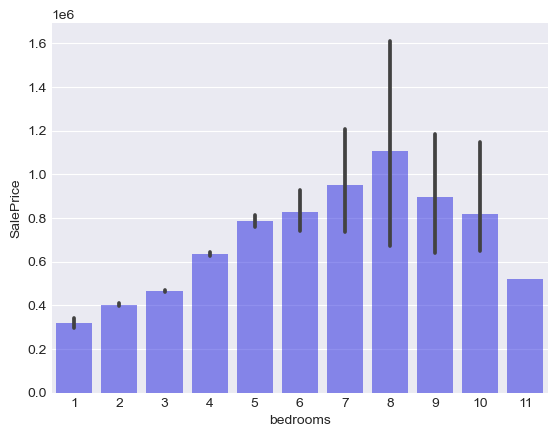

In [28]:
#plotting a bar plot to visualize number of bedrooms against sale price
sns.barplot(x = data['bedrooms'], y = data['SalePrice'], data = data, color = 'blue', alpha = 0.5);

From the barplot above, houses with 8 bedrooms have the highest SalePrice. Houses with fewer bedrooms have a lower Sale Price which would mean that home buyers would prefer houses with more bedrooms.

### 2. How does square feet of living room area impact sale price?

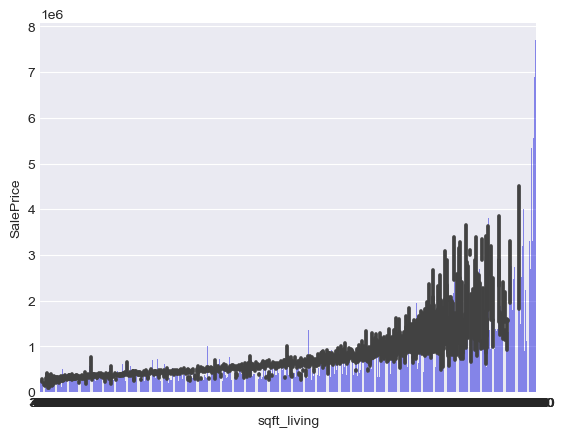

In [29]:
#plotting a bar plot to visualize number of bedrooms against sale price
sns.barplot(x = data['sqft_living'], y = data['SalePrice'], data = data,  color = 'blue', alpha = 0.5);

Clearly, houses with larger living room area square feet have a higher sale price. The price of houses increases with increase in square feet of living area.

### 3. Does presence or absence of a waterfront have an impact on saleprice?

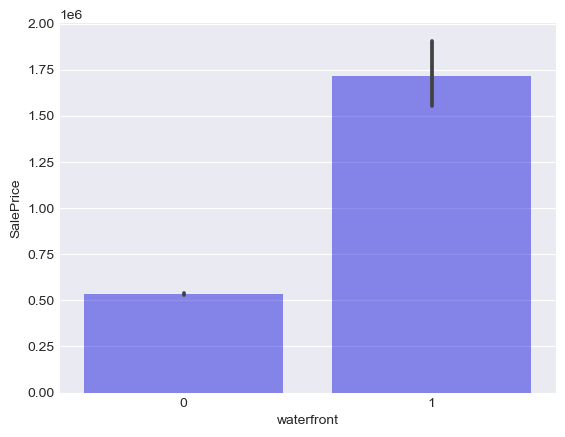

In [30]:
#plotting a bar plot to visualize number of bedrooms against sale price
sns.barplot(x = data['waterfront'], y = data['SalePrice'], data = data,  color = 'blue', alpha = 0.5);

From the graph above, houses with a view to a waterfron have a higher sale price than house with no view to a waterfront.

# 4. Modelling
I'll use a significance level of **alpha = 0.05** to verify the significance of my models.

## i) Model A
To begin with, I will start with a simple linear regression model with one feature as the baseline model. To choose the feature I will use, I'll check the features' correlation with our target `SalePrice` column. 

Plotting a scatter plot between each feature and SalePrice:

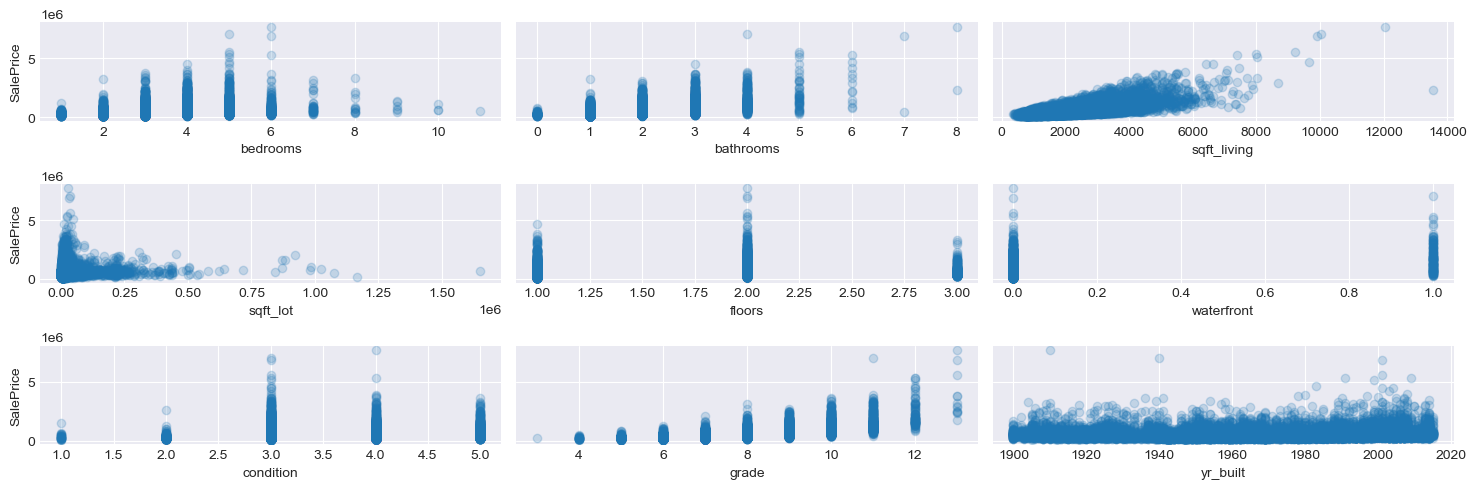

In [45]:
y = data['SalePrice']
X = data.drop('SalePrice', axis = 1)

#plotting scatter plot
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15,5), sharey = True)

#looping through every axis to plot each scatter plot
for i,column in enumerate(X.columns):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    ax.scatter(X[column], y, alpha = 0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel('SalePrice')
fig.tight_layout()    

From the plot above, column `sqft_living` appears to have a strong correlation with `SalePrice`. To confirm this I can also check the correlation of each column like below:

In [37]:
data.corr()['SalePrice']

SalePrice      1.000000
bedrooms       0.316007
bathrooms      0.510698
sqft_living    0.701940
sqft_lot       0.089868
floors         0.237411
waterfront     0.264310
condition      0.036038
grade          0.668078
yr_built       0.054018
Name: SalePrice, dtype: float64

From the result above, the feature with the highest correlation besides `SalePrice` itself is `sqft_living`. I'll use this for my baseline model:

In [46]:
#creating a model with statsmodels
X1 = data['sqft_living']
modelA = sm.OLS(y, sm.add_constant(X1)).fit()
modelA_results = modelA.summary()
print(modelA_results)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:49:47   Log-Likelihood:            -2.9995e+05
No. Observations:               21589   AIC:                         5.999e+05
Df Residuals:                   21587   BIC:                         5.999e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.404e+04   4411.108     -9.984      

## Interpretation
As one might expect, using a single feature did not provide a strong model.
From the results above, our model has an R-squared of `0.493`. This means that about *49.3%* of the variation in the dependent variable y is explained by our model.

The model is statistically significant since the probability of the F-statistic is less than the significance level of **0.05**.

Also:
The coefficent of `sqft_living` is 280, which means that for every additional square-foot of living area, the price increases by USD 280.

For a house with 0 sqft_living which is not possible, the sale price is -4.404e+04. We can't have a negative sale price as well as a 0 square foot of living area.

Let's evaluate it by computing the **RMSE**

In [48]:
#calculating its root mean squared error
rmse = ((modelA.resid**2).sum()/len(y))**0.5
rmse

261689.59304257232

We can interpret the **RMSE** as the mean error in USD, i.e. on average the actual price will be USD 261,689 more or less than our predicted price. This is actually not bad for just one feature.

Our model is:
>SalePrice = -4.404e+04 + 280.8815sqft_living

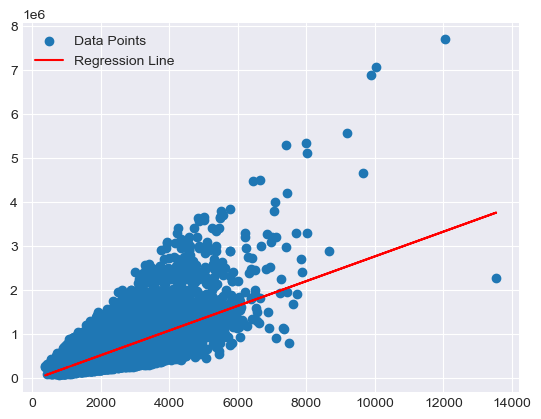

In [67]:
#our prediction model
y_pred= -4.404e+04 + 280.8815*data['sqft_living']

#plotting a scatter plot with the regression line
plt.scatter(X1,y, label = 'Data Points')
plt.plot(X1, y_pred, color = 'red', label = 'Regression Line')
plt.legend();

We see that for smaller living areas our model looks decent but as the `sqft_living` value increases our model's performance declines.
This shows that sqft_living is not a good enough predictor for larger houses.

I'll create a dataframe to store these model results:

In [73]:
#defining a dataframe to store model results
result_table = pd.DataFrame({'Model': [], 'Description':[], ' Num Features' : [], 'R-squared':[],
                                'Adj R-squared':[], 'RMSE': []})
result_table.loc[0] = ['ModelA', 'Sqft_living', modelA.df_model, round(modelA.rsquared,3)
                          ,round(modelA.rsquared_adj,3), int(rmse)]

#previewing the table
result_table

,Model,Description,Num Features,R-squared,Adj R-squared,RMSE
0,ModelA,Sqft_living,1.0,0.493,0.493,261689


In [ ]:
# # Define one-hot encoding function
# def one_hot_encode(df, catcols):
#     '''Returns df with dummy vars and drops original column'''
    
#     # Create DataFrame with above columns
#     dfonehot = df[catcols].astype('category')
    
#     # Get dummy variables and drop first one to not create dependency
#     dfonehot = pd.get_dummies(dfonehot, drop_first = True)
    
#     # Recreate DataFrame with one-hot encoded variables
#     df = pd.concat([df,dfonehot], axis=1)
    
#     # Drop columns where we have done one-hot encoding
#     df = df.drop(catcols, axis = 1)
        
#     return df